### 1. Importing Libraries



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfx=pd.read_csv("../Logistic_X_Train.csv")
dfy=pd.read_csv("../Logistic_Y_Train.csv")
df_test=pd.read_csv("../Logistic_X_Test.csv")

In [3]:
dfx.head()

,f1,f2
0,0.574727,0.787277
1,0.251502,0.908940
2,1.860578,0.013763
3,0.019477,1.047210
4,0.029794,0.252236


In [4]:
X_train=dfx.values
Y_train=dfy.values
X_test=df_test.values
Y_train=Y_train.reshape(-1,)

In [5]:
print(X_train.shape,Y_train.shape)
print(X_test.shape)

(2250, 2) (2250,)
(750, 2)


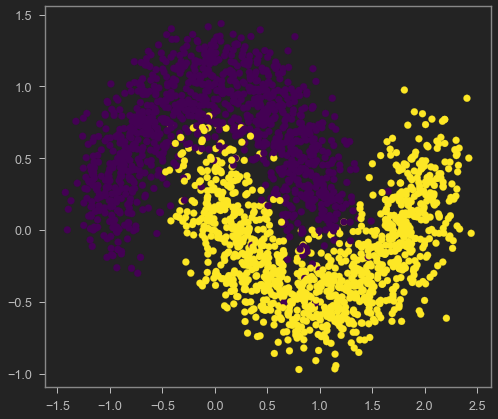

In [6]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train);

### 2.  Algorithm From Scratch

In [31]:
class Logistic_Regression:
    
    def __init__(self,features):
        self.w = 2*np.random.random((features,))
        self.b = 5*np.random.random()
    
    def sigmoid(self,z):
        return 1.0/(1.0+np.exp(-1.0*z))
        
    def forward_pass(self,x):
        return self.sigmoid(np.dot(self.w,x.T)+self.b)
    
    def error(self,x,y):
        m=y.shape[0]
        
        y_pred=self.forward_pass(x)
        
        error = np.mean((-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred)))
        
        return error
    
    def gradient(self,x,y):
        m=x.shape[0]
        y_pred=self.forward_pass(x)
        
        gradient_w = np.dot(x.T, (y_pred-y))
        gradient_b = np.sum(y_pred-y)
        
        return [gradient_w/m,gradient_b/m]
    
    def gradient_descent(self,x,y,learning_rate=0.1,max_iterations=1000):
        losses = []
        for i in range(max_iterations):
            e = self.error(x, y)
            losses.append(e)
            [grad_w,grad_b]=self.gradient(x,y)
            self.w-= (learning_rate * grad_w)
            self.b-=(learning_rate * grad_b)
            
        return losses
    
    def predict(self,X_test):
        confidence = self.forward_pass(X_test)
        confidence = (confidence>=0.5)*1
        return confidence

In [32]:
obj=Logistic_Regression(X_train.shape[1])

In [33]:
error=obj.gradient_descent(X_train,Y_train)

In [34]:
obj.error(X_train,Y_train)

0.2950328389861834

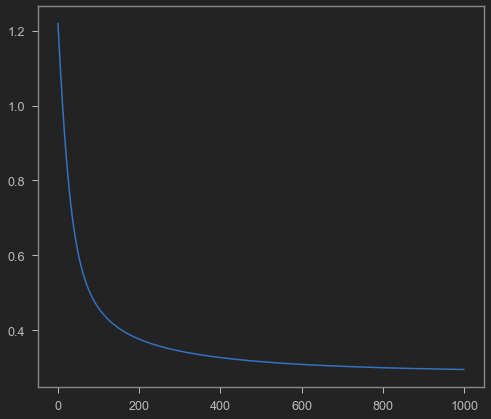

In [35]:
plt.plot(error);

In [12]:
predict=obj.predict(X_test)

In [13]:
l_r=pd.DataFrame({'label':predict})
l_r.to_csv("log_reg_scratch.csv",index=False)

### Accuracy of 86%

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lr=LogisticRegression()

In [16]:
lr.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
prediction=lr.predict(X_test)

In [18]:
l_r=pd.DataFrame({'label':prediction})
l_r.to_csv("log_reg_inbuilt.csv",index=False)

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
params={
    'C':[5.0,6.0,8.0,10.0],
    'max_iter':[100,150,200],
    'penalty':['l1', 'l2', 'elasticnet', 'none']
}

In [21]:
gs=GridSearchCV(estimator=lr,param_grid=params,n_jobs=-1)
gs.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [5.0, 6.0, 8.0, 10.0],
                         'max_iter': [100, 150, 200],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [22]:
gs.best_estimator_

LogisticRegression(C=5.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
gs.best_params_

{'C': 5.0, 'max_iter': 100, 'penalty': 'l2'}

In [24]:
gs.best_score_

0.8693333333333333

In [25]:
gs_predict=gs.predict(X_test)

In [26]:
gs_d=pd.DataFrame({'label':gs_predict})
gs_d.to_csv("gs_predict.csv",index=False)

### Accuracy of 86%